# Running WST in julia

Core Francisco Park

First replace the following string with your DHC directory

In [1]:
DHC_dir="/home/cfpark/Projects/WST3D/DHC/";

We push this to the PATH, so julia can see it. Notice that adding strings is * in julia.

push is the analogue of append in python and ! means that it modifies the first argument (maybe not always... CFP is not sure..)

In [2]:
push!(LOAD_PATH, DHC_dir*"main");

Now you can import. You Should run
```julia
using Pkg; Pkg.add("package_name")
```

for all missing packages

In [3]:
#using Pkg; Pkg.add("Plots")

In [4]:
import DHC_2DUtils
import Plots

Now, let's run an example for a 128^2 image

In [5]:
N=128
image=rand(Float64,N,N)
size(image)

(128, 128)

Make the appropriate filters first argument is the scale and the second is the # of angular bins

In [6]:
hash=DHC_2DUtils.fink_filter_hash(1,8,nx=N)

Dict{String, Any} with 13 entries:
  "j_value"     => [1.0, 2.0, 3.0, 4.0, 5.0]
  "S2_iso_mat"  => …
  "psi_index"   => Int32[1 6 … 31 36; 2 7 … 32 37; … ; 4 9 … 34 39; 5 10 … 35 4…
  "phi_index"   => 41
  "wd"          => [1.0, 1.0, 1.0, 1.0, 2.0]
  "pc"          => 1
  "npix"        => 128
  "S1_iso_mat"  => …
  "theta_value" => [0.0, 0.392699, 0.785398, 1.1781, 1.5708, 1.9635, 2.35619, 2…
  "J_L"         => Int32[0 0; 1 0; … ; 4 7; 5 0]
  "fs_center_r" => [32.0, 16.0, 8.0, 4.0, 2.0]
  "filt_value"  => [[0.00151097, 0.00151097, 0.00605357, 0.0218325, 0.040825, 0…
  "filt_index"  => Vector{CartesianIndex{2}}[[CartesianIndex(7, 16), CartesianI…

now lets apply it to our image

In [7]:
WSTvals=DHC_2DUtils.DHC_compute(image,hash);
size(WSTvals)

(1724,)

Plot the results!

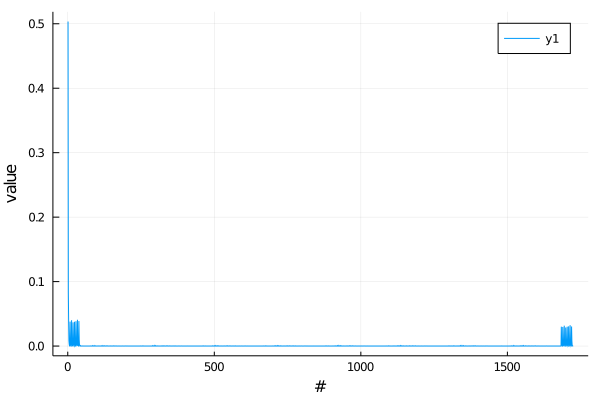

In [8]:
Plots.plot(WSTvals,ylabel="value",xlabel="#")

## Running WST on the GPU

For bigger than 128^3, we recommend running 3D WST on a GPU.

If CUDA is not installed, uncomment and run the following

In [9]:
#using Pkg; Pkg.add("CUDA")

2D case

In [10]:
N=64
image=rand(Float64,N,N);
hash_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8,nx=N)
WSTvals=DHC_2DUtils.DHC_compute_gpu(image,hash_gpu);
size(WSTvals)

(1124,)

3D case

In [11]:
N=64
image=rand(Float64,N,N,N);
hash_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8,nx=N,threeD=true,nz=N)
WSTvals=DHC_2DUtils.DHC_compute_3d_gpu(image,hash_gpu)
size(WSTvals)

(17558,)